### Southern Water Corp Python Case Study

While working on the Financial unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's data.

**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2. 

### Let's get started!

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries:  

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. You will need to import DateFormatter from matplotlib as well.

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodel.api** - This library will enable you to create statistical models. You will need this library when perfroming regession analysis in Part 2 of this case study.

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline   
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as datetime
import statsmodels.api as sm 

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into three files: Desalination_Unit_File 001, Desalination_Unit_File_002, and Desalination_Unit_File_003. You'll need to merge them into a complete dataframe for your analysis. To do this, follow the steps below: 

i. Import each of the three separate files and merge them into one dataframe.  Suggested names: **(dataframe_1, dataframe_2, dataframe_3)**. Don't forget to use the **header** argument to ensure your columns have meaningful names! 

ii. Print descriptive statistics on your combined dataframe using **.describe()** and **.info()**

iii. Set "TIMEFRAME" as the index on your combined dataframe. 

In [2]:
#Data has been split into three files. Merge them all.
#Timeframe in files have European dates. Need to format to US date. 
dataframe_1 = pd.read_csv("C:/Users/tania/Desalination_Unit_File_001.csv", header=0)
dataframe_1['TIMEFRAME'] = pd.to_datetime(dataframe_1['TIMEFRAME']).apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S')if not pd.isnull(x) else '')
dataframe_2 = pd.read_excel("C:/Users/tania/Desalination_Unit_File_002.xlsx", header=0)
dataframe_2['TIMEFRAME'] = pd.to_datetime(dataframe_2['TIMEFRAME']).apply(lambda x: x.strftime('%m/%d/%Y %H:%M:%S')if not pd.isnull(x) else '')
dataframe_3 = pd.read_excel("C:/Users/tania/Desalination_Unit_File_003.xlsx", header=0)
dataframe_3['TIMEFRAME'] = pd.to_datetime(dataframe_3['TIMEFRAME']).apply(lambda x: x.strftime('%m/%d/%Y %H:%M:%S')if not pd.isnull(x) else '')

df = [dataframe_1, dataframe_2, dataframe_3]
df_all = pd.concat(df)

df_all.set_index('TIMEFRAME', inplace =True)
df_all['PUMP FAILURE (1 or 0)'].fillna(0,inplace=True) # Fill NaN with 0
df_all.dropna(inplace=True)

df_all.head()

#print(np.transpose(df_all))
#df_all.describe() 
#print(df_all.info)
#index_col=0

,SURJEK_FLOW_METER_1,SURJEK_FLOW_METER_2,ROTATIONAL_PUMP_RPM,SURJEK_PUMP_TORQUE,MAXIMUM_DAILY_PUMP_TORQUE,SURJEK_AMMONIA_FLOW_RATE,SURJEK_TUBE_PRESSURE,SURJEK_ESTIMATED_EFFICIENCY,PUMP FAILURE (1 or 0)
TIMEFRAME,,,,,,,,,
12/09/2014 00:00:00,0.0,-4.768066,0.0,0.0,0.0,0,0.000000,0.0,0.0
12/09/2014 00:01:00,0.0,-4.855957,0.0,0.0,0.0,0,0.000000,0.0,0.0
12/09/2014 00:01:00,0.0,-7.447938,0.0,0.0,0.0,0,378.112800,0.0,0.0
12/09/2014 00:01:00,0.0,-8.745117,0.0,0.0,0.0,0,379.028300,0.0,0.0
12/09/2014 00:02:00,0.0,-6.877441,0.0,0.0,0.0,0,378.959919,0.0,0.0


In [3]:
#df_all.isnull().sum()
df_all.describe()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6998 entries, 12/09/2014 00:00:00 to 12/10/2014 16:52:00
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SURJEK_FLOW_METER_1          6998 non-null   float64
 1   SURJEK_FLOW_METER_2          6998 non-null   float64
 2   ROTATIONAL_PUMP_RPM          6998 non-null   float64
 3   SURJEK_PUMP_TORQUE           6998 non-null   float64
 4   MAXIMUM_DAILY_PUMP_TORQUE    6998 non-null   float64
 5   SURJEK_AMMONIA_FLOW_RATE     6998 non-null   int64  
 6   SURJEK_TUBE_PRESSURE         6998 non-null   float64
 7   SURJEK_ESTIMATED_EFFICIENCY  6998 non-null   float64
 8   PUMP FAILURE (1 or 0)        6998 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 519.4+ KB


---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data. You should now also have a rough sense of the number of entires in each dataset. However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the tables you created into a boxplot by following these instructions:

i) Create a boxplot from your combined dataframe using **matplotlib and seaborn** with all the variables plotted out. Note: do any particular variables stand out to you? Title your visualization **"Boxplot for all attributes"** and set the boxplot size to 25 x 5.

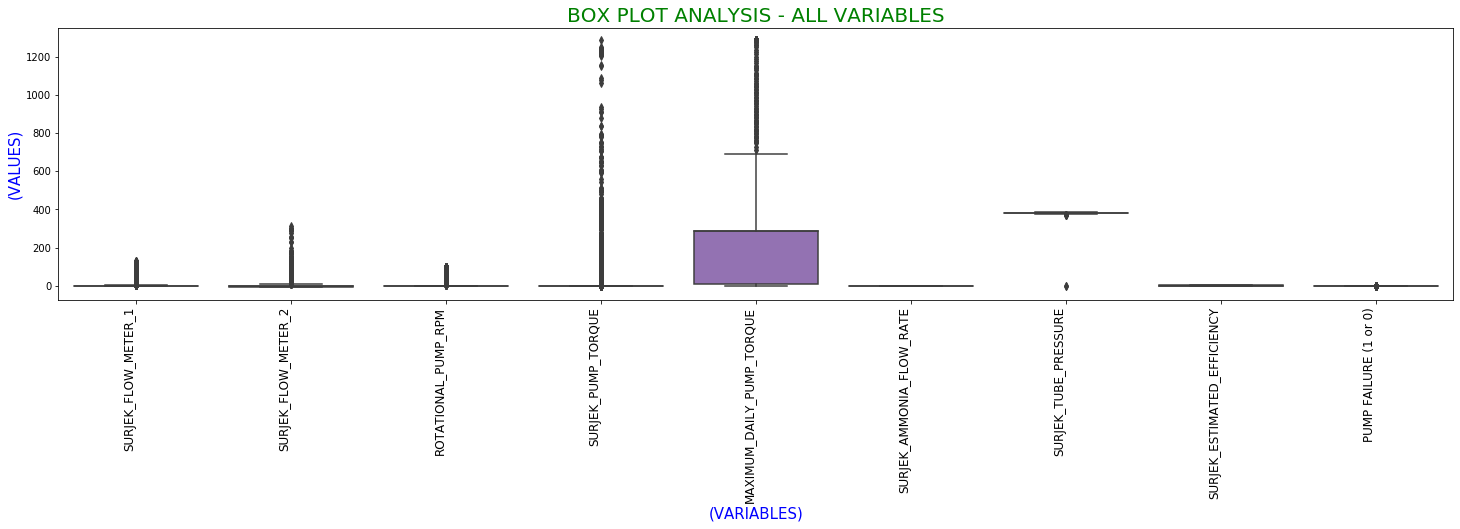

In [4]:
# Chart
plt.rcParams['figure.figsize'] = (25,5)
sns.boxplot(data=df_all)
# Labels
plt.xlabel('(VARIABLES)', fontsize= 15, color ='blue')
plt.ylabel('(VALUES)', fontsize=15, color='blue')  
plt.title('BOX PLOT ANALYSIS - ALL VARIABLES', fontsize=20, color='green')
plt.xticks(rotation=90, horizontalalignment='right', fontsize=12)
#plt.ylim(0,1200)
plt.show()

#### You would probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see.
#### Perhaps, we should remove these variables and look at the box plot again?

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span>  
i) Create the same boxplot from  <span style="color:green">Step 3</span>, but this time, filter out SURJEK_PUMP_TORQUE and MAXIMUM_DAILY_PUMP_TORQUE. Create a new dataframe and apply a filter named **'dataframe_filt'**. Title this boxplot 'Boxplot without Pump Torque, or Max Daily Pump Torque'. 



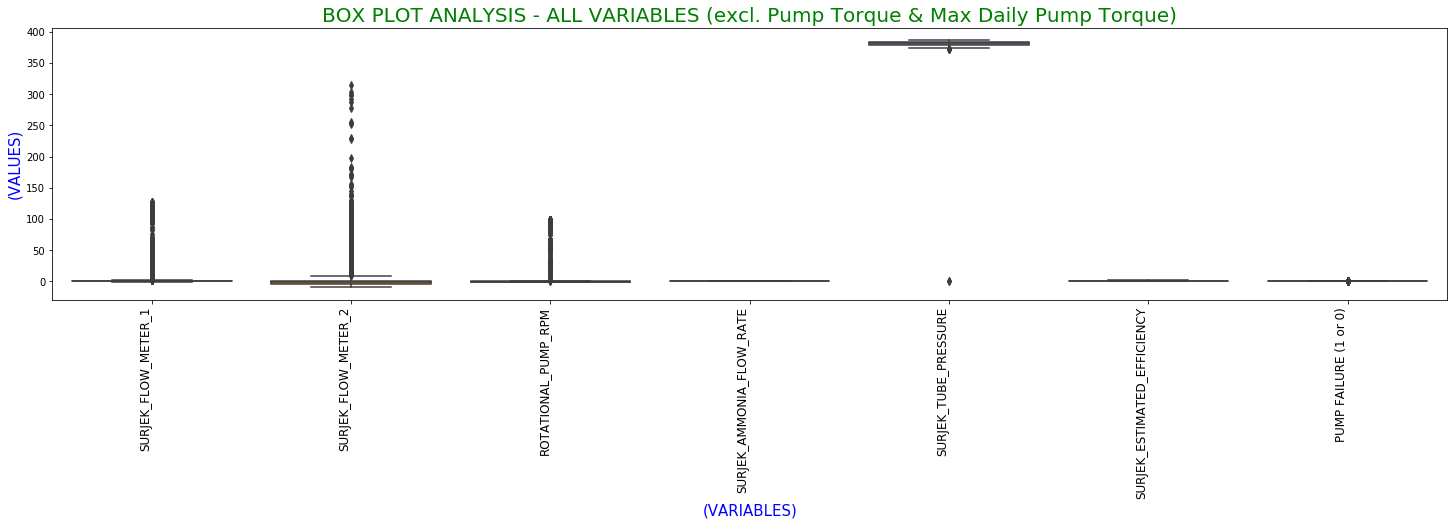

In [5]:
#Setup Filter
filt = df_all[['SURJEK_FLOW_METER_1','SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE','SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']] 
plt.rcParams['figure.figsize'] = (25,5)
#----------------------------------------------------
filt1 = sns.boxplot(data=filt)
# Labels
plt.xlabel('(VARIABLES)', fontsize=15, color='blue')
plt.ylabel('(VALUES)', fontsize=15, color = 'blue')  
plt.title('BOX PLOT ANALYSIS - ALL VARIABLES (excl. Pump Torque & Max Daily Pump Torque)', fontsize=20, color = 'green')
plt.xticks(rotation=90, horizontalalignment='right', fontsize=12)
plt.show()

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filter Your Boxplot by Column Value</span> 

i) Using the whole dataset, create another boxplot using the whole dataset but this time, compare the distributions for when Pump Failure is 1 (The Pump has failed) and 0 (Pump is in normal operations). You will be creating two boxplots using the 'PUMP FAILURE (1 or 0)' column in the dataset.

Note: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.


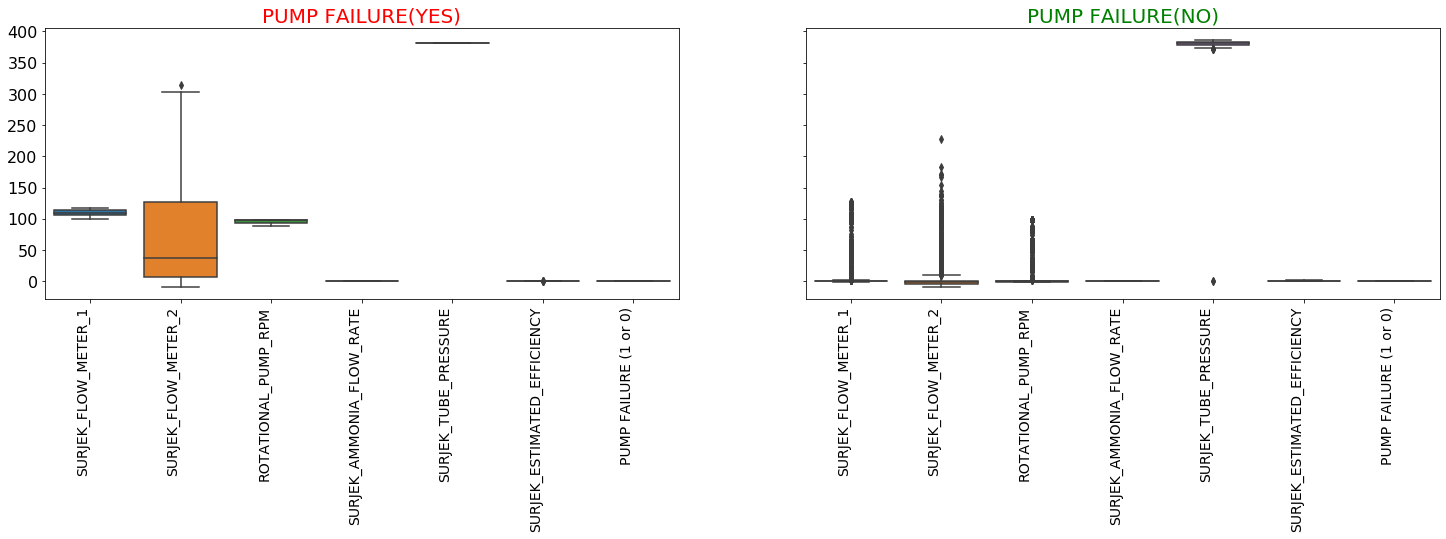

In [6]:
# Create subplots
fig, axes = plt.subplots(1, 2, sharey=True)

# Apply filters
pumpfailureYES = df_all[df_all['PUMP FAILURE (1 or 0)'] == 1]
pumpfailureNO = df_all[df_all['PUMP FAILURE (1 or 0)'] == 0]

failureYES = pumpfailureYES[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']]
failureNO = pumpfailureNO[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)']] 
mpl.rcParams['figure.figsize'] = (25,5)

# Create boxplots
sns.boxplot(data=failureYES, ax= axes[0],).set_title('PUMP FAILURE(YES)',fontsize=20, color='red')
sns.boxplot(data=failureNO, ax= axes[1],).set_title('PUMP FAILURE(NO)',fontsize=20, color='green')

for ax in fig.axes:
    mpl.pyplot.sca(ax)
    plt.xticks(rotation=90, horizontalalignment='right', fontsize=14)
    plt.yticks(fontsize=16)

plt.show()

### Step 6: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

In [9]:
Q3 = df_all.quantile(0.75)
Q1 = df_all.quantile(0.25)
IQR = Q3 - Q1
# FORMAT TEXT  
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print(color.BOLD + color.UNDERLINE +'75th PERCENTILE'+ color.END)
print(Q3)
print(color.BOLD + color.UNDERLINE +'25th PERCENTILE' + color.END)
print(Q1)
print(color.BOLD + color.UNDERLINE +'INTERQUARTILE' + color.END)
print(IQR)

75th PERCENTILE
SURJEK_FLOW_METER_1              0.704162
SURJEK_FLOW_METER_2              0.981540
ROTATIONAL_PUMP_RPM              0.000000
SURJEK_PUMP_TORQUE              -1.680961
MAXIMUM_DAILY_PUMP_TORQUE      285.493400
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE           382.690400
SURJEK_ESTIMATED_EFFICIENCY      1.240724
PUMP FAILURE (1 or 0)            0.000000
Name: 0.75, dtype: float64
25th PERCENTILE
SURJEK_FLOW_METER_1              0.000000
SURJEK_FLOW_METER_2             -4.766639
ROTATIONAL_PUMP_RPM             -0.687240
SURJEK_PUMP_TORQUE              -2.030993
MAXIMUM_DAILY_PUMP_TORQUE        9.177878
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE           379.028300
SURJEK_ESTIMATED_EFFICIENCY      0.000000
PUMP FAILURE (1 or 0)            0.000000
Name: 0.25, dtype: float64
INTERQUARTILE
SURJEK_FLOW_METER_1              0.704162
SURJEK_FLOW_METER_2              5.748178
ROTATIONAL_PUMP_RPM              0.687240
SURJEK_PUMP_TORQUE

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Identify Outliers</span> 

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.

Ensure your dataframe doesn't include the attribute TIMEFRAME - if it does, please drop this attribute for now.


In [10]:

No_Outliers = df_all[~((df_all < (Q1 - 1.5 * IQR)) |(df_all > (Q3 + 1.5 * IQR))).any(axis=1)]

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(len(df_all))  + " entries") 
print ("When we have not removed any outliers from the dataset, we have " + str(len(No_Outliers)) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(len(No_Outliers)/len(df_all)) ) 


When we have not removed any outliers from the dataset, we have 6998 entries
When we have not removed any outliers from the dataset, we have 3855 entries
The proportion of outliers which exist when compared to the dataframe are: 0.5508716776221778


---------------------------------------------------------------------------

### Step 8: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if you are doing a failure analysis, it is likely those outliers actually contain valuable insights you will want to keep as they represent a deviation from the norm that you'll need to understand. 


#### Note 2: Please display the two boxplots side-by-side. You can do this by creating a shared X axis or by creating two axes and looping through them while using the pyplot command.


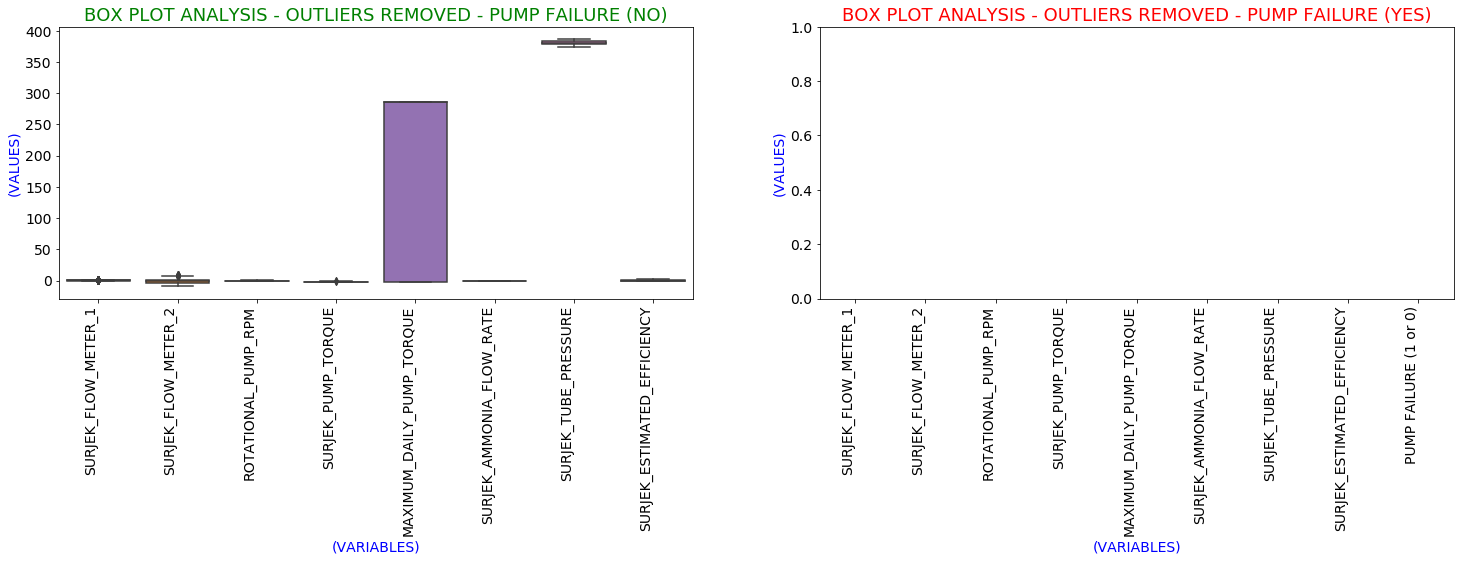

In [11]:
mpl.rcParams['figure.figsize'] = (25,5)

No_Outliers = df_all[~((df_all < (Q1 - 1.5 * IQR)) |(df_all > (Q3 + 1.5 * IQR))).any(axis=1)]
# SUBPLOT 1
plt.subplot(1,2,1)   
filt4 = No_Outliers[No_Outliers['PUMP FAILURE (1 or 0)']==0]
filt5 = No_Outliers[No_Outliers['PUMP FAILURE (1 or 0)']==1]
filt6 = filt4[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
'SURJEK_ESTIMATED_EFFICIENCY']]

sns.boxplot(data=filt6)
plt.xticks(rotation=90, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('(VARIABLES)', fontsize=14, color='blue')
plt.ylabel('(VALUES)', fontsize=14, color = 'blue')  
plt.title('BOX PLOT ANALYSIS - OUTLIERS REMOVED - PUMP FAILURE (NO)', fontsize=18, color = 'green')

# SUBPLOT 2
plt.subplot(1,2,2)
filt6 = filt5[['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
'SURJEK_ESTIMATED_EFFICIENCY']]

sns.boxplot(data=filt5,)
plt.xticks(rotation=90, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize =14)
plt.xlabel('(VARIABLES)', fontsize=14, color='blue')
plt.ylabel('(VALUES)', fontsize=14, color = 'blue')  
plt.title('BOX PLOT ANALYSIS - OUTLIERS REMOVED - PUMP FAILURE (YES)', fontsize=18, color = 'red')

plt.show()


### Based on the boxplots you've created, you've likely come to the conclusion that, for this case study, you actually _shouldn't_ remove the outliers, as you are attempting to understand the Pump Failure Behavior.

-----

### Step 9: <span style="color:green">Plot and Examine Each Column</span> 
We have provided a filtered column list for you.   

Using a loop, iterate through each of the Column Names and plot the data. (You can either make your X-axis the Timeframe variable or you can leave it blank and use the row numbers as an index). 

Find the minimum (min) and maximum (max) time in the dataframe. Use Tight_layout. Include a title with min and max time. 

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute (e.g. SURJEK_FLOW_METER_1) on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html

##### Note: Please ensure that the dataframe you are plotting contains all the outliers and that the Pump Failure Behaviour includes both the 0 and 1 State.

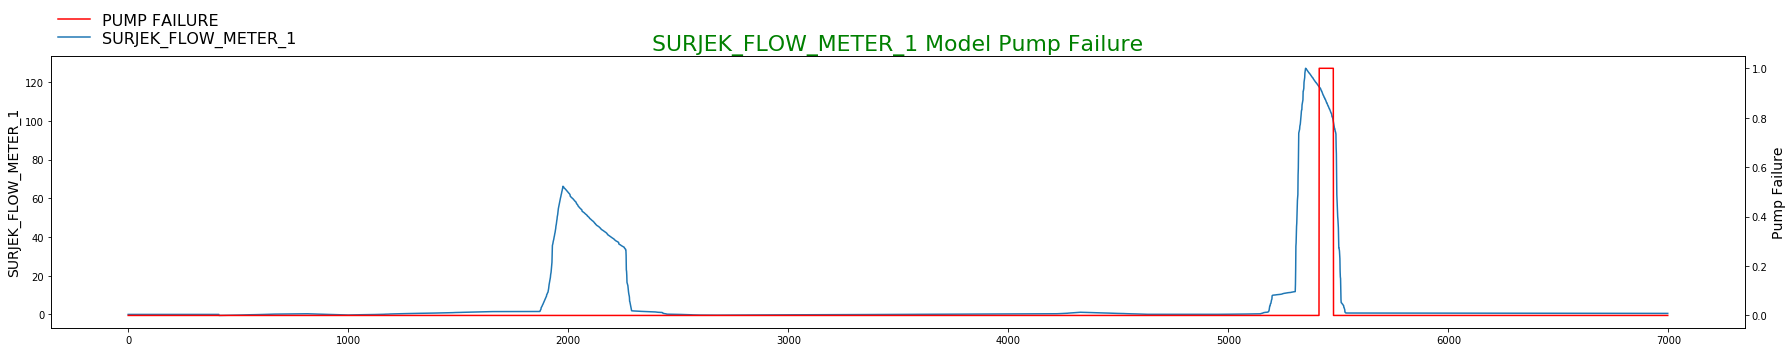

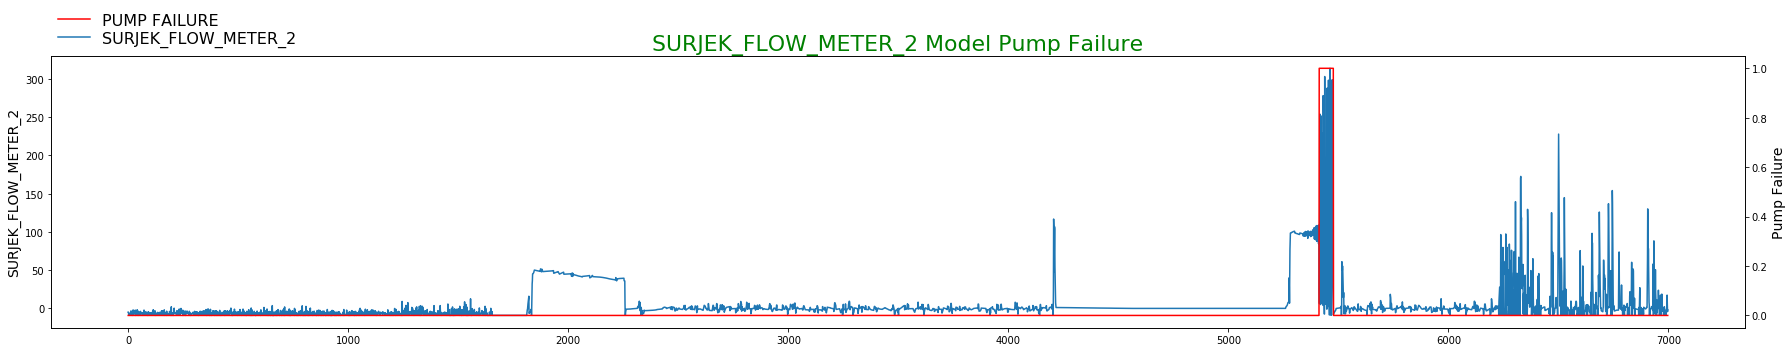

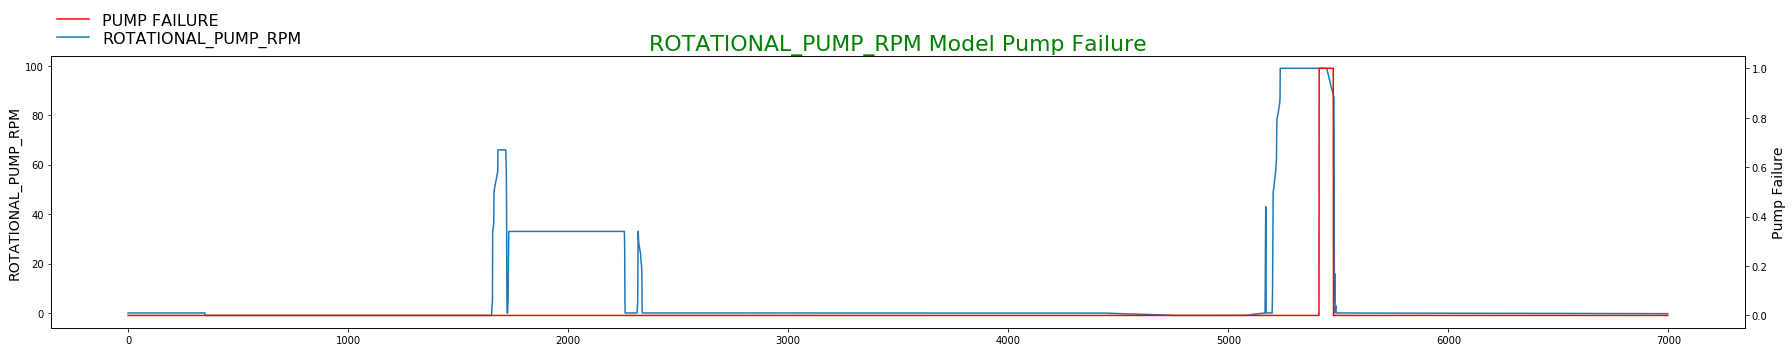

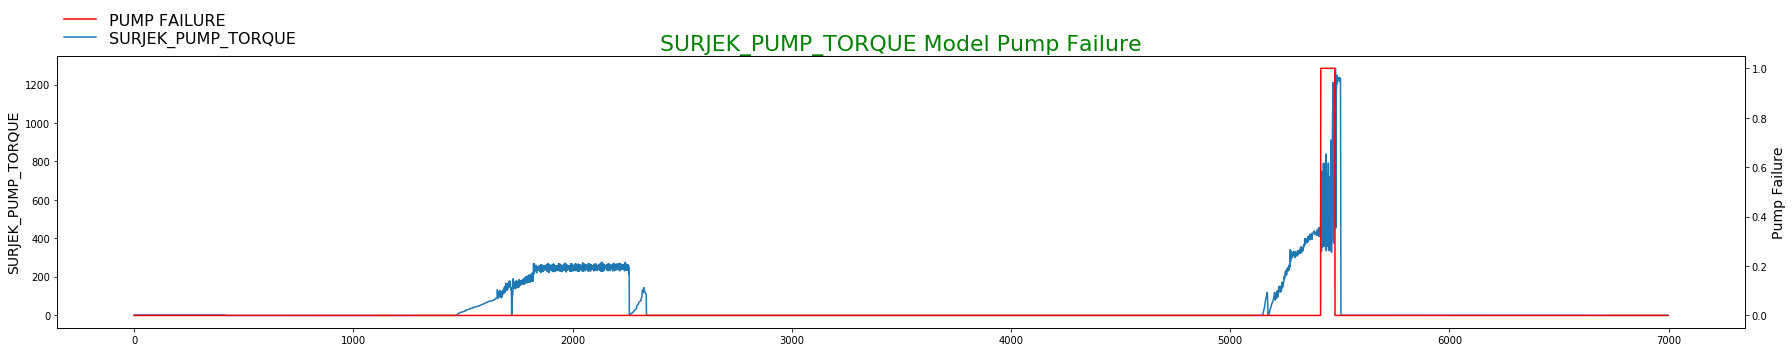

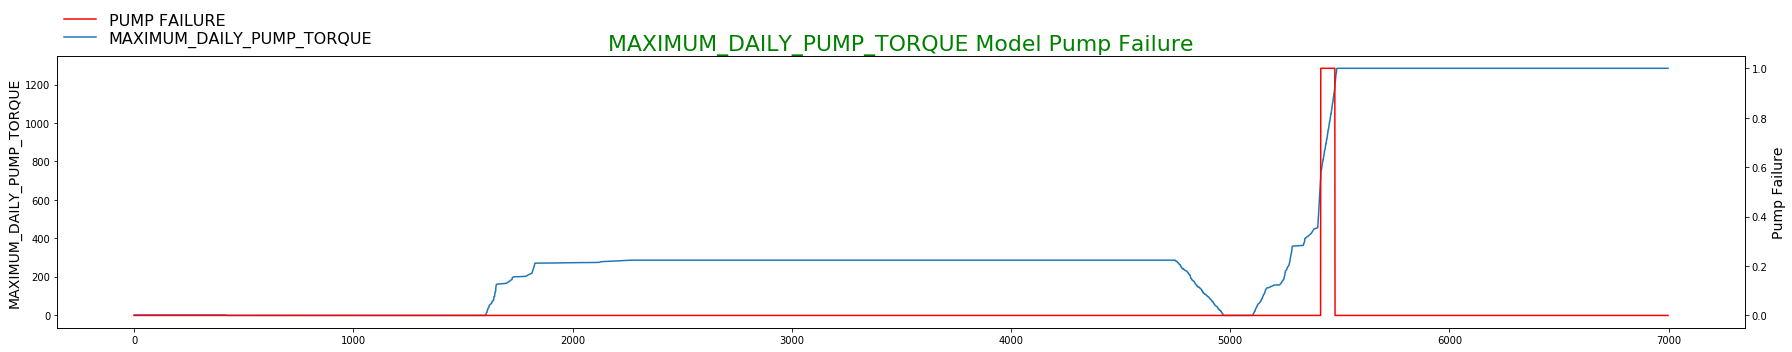

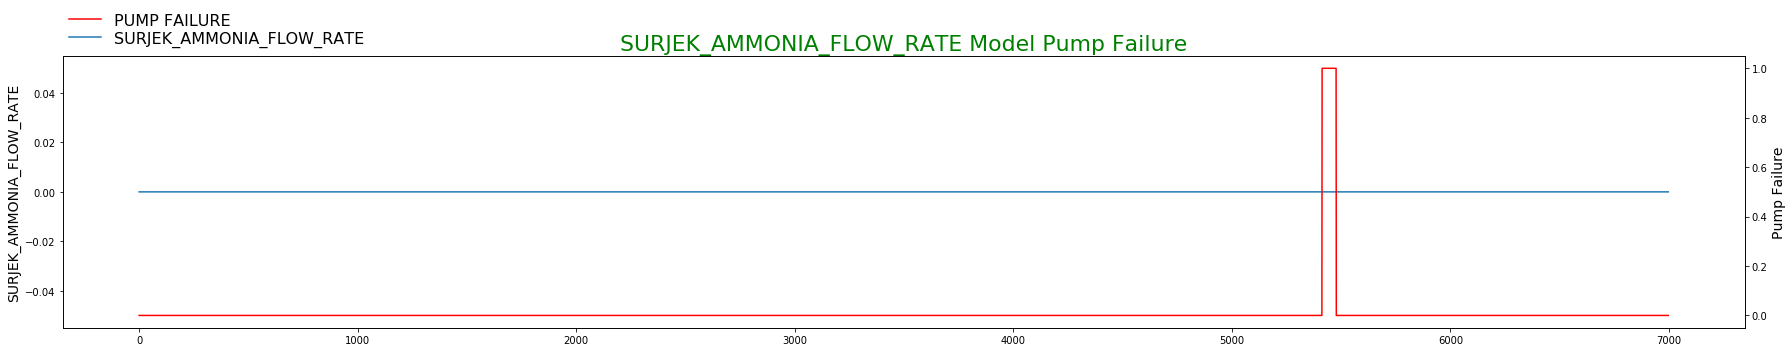

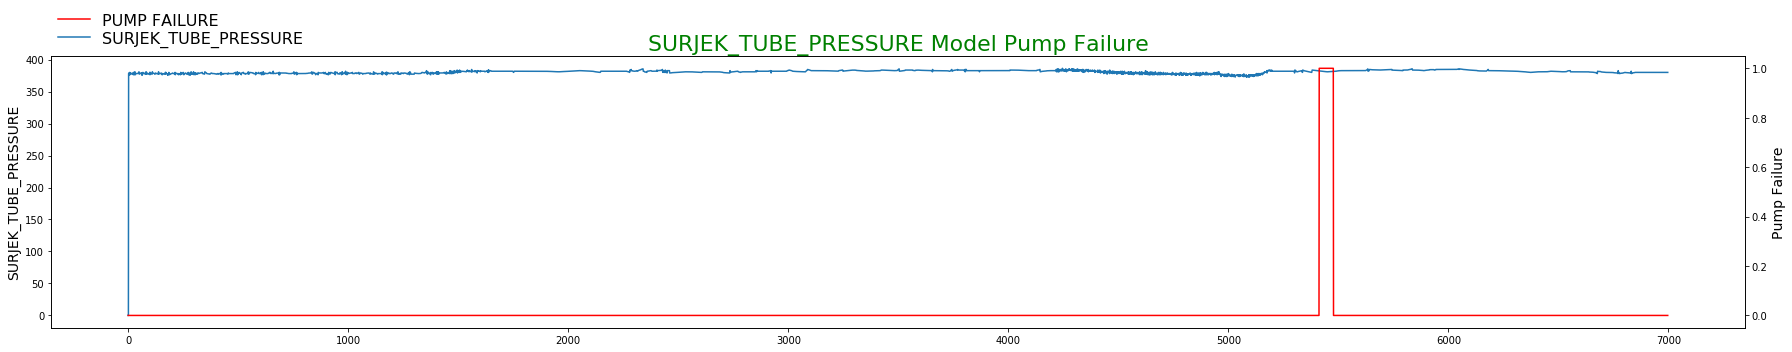

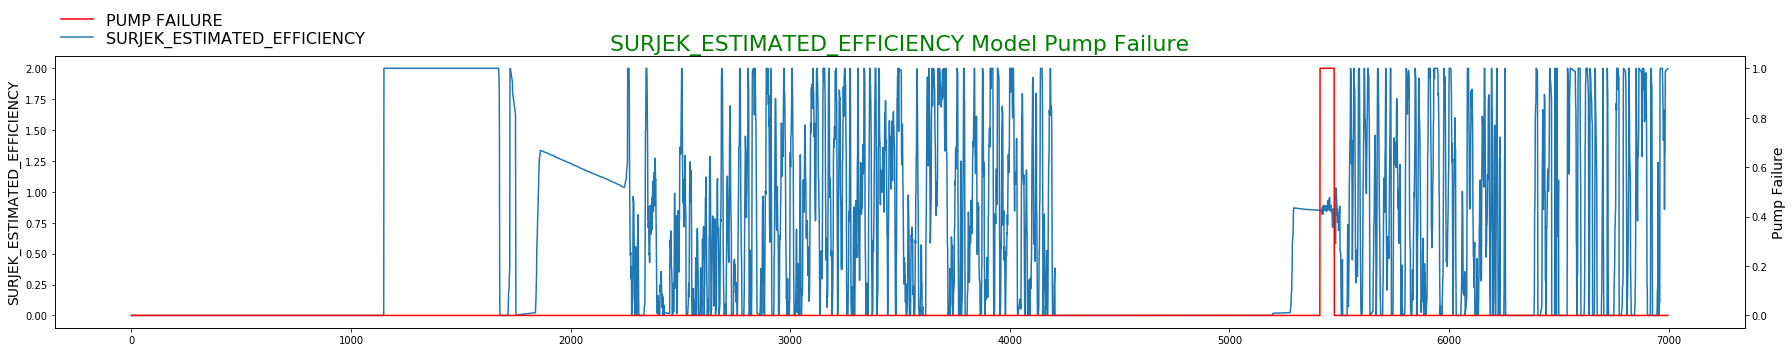

In [12]:
from datetime import datetime
#Setup filter
dataframe = pd.concat(df)
dataframe['PUMP FAILURE (1 or 0)'].fillna(0,inplace=True) # Fill NaN with 0
dataframe.dropna(inplace=True)
dataframe.reset_index(inplace=True)
filt7 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt8 = ['PUMP FAILURE (1 or 0)']
colList = dataframe[filt7].columns
mpl.rcParams['figure.figsize'] = (25,5)
#-------------------------------------------------------------------
for i in colList:
    failureState = dataframe[filt8]
    ax1 = dataframe[i].plot()
    ax1.set_ylabel(i, fontsize=14)
    ax2 = ax1.twinx()
    ax2.plot(failureState, 'red', label='PUMP FAILURE')
    ax2.set_ylabel("Pump Failure", fontsize=14)
    
    ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False, fontsize=16)
    ax2.legend(loc='lower left', bbox_to_anchor= (0.0, 1.08), ncol=2,
            borderaxespad=0, frameon=False, fontsize=16)
    
    maxTime = dataframe.index.max()
    minTime = dataframe.index.min()
   
    plt.tight_layout()
    plt.title(i + " Model Pump Failure",fontsize = 22, color='green')
 
    plt.show()


Of course, given that all the attributes have varying units, you might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that you include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 

#### Hint: Remember to make use of the Dual-Axis plot trick you learned in the previous exercise!


In [13]:
print(minTime)
print(maxTime)
print(dataframe['TIMEFRAME'])

0
6997
0       12/09/2014 00:00:00
1       12/09/2014 00:01:00
2       12/09/2014 00:01:00
3       12/09/2014 00:01:00
4       12/09/2014 00:02:00
               ...         
6993    12/10/2014 16:52:00
6994    12/10/2014 16:52:00
6995    12/10/2014 16:52:00
6996    12/10/2014 16:52:00
6997    12/10/2014 16:52:00
Name: TIMEFRAME, Length: 6998, dtype: object


---

### Step 10: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.


ii) Re-plot all variables for the time period 10/12/2014 14:40 to 10/12/2014 14:45, focusing specifically on the first Pump “Failure”. 


**Open-ended Question:**
Do any particular variables seem to move in relation to the failure event?

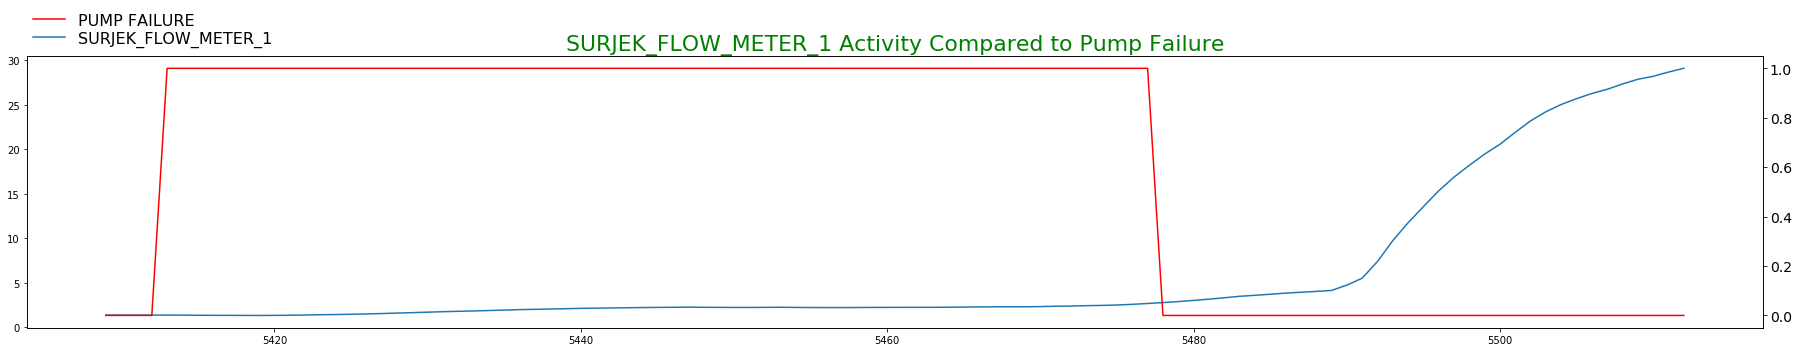

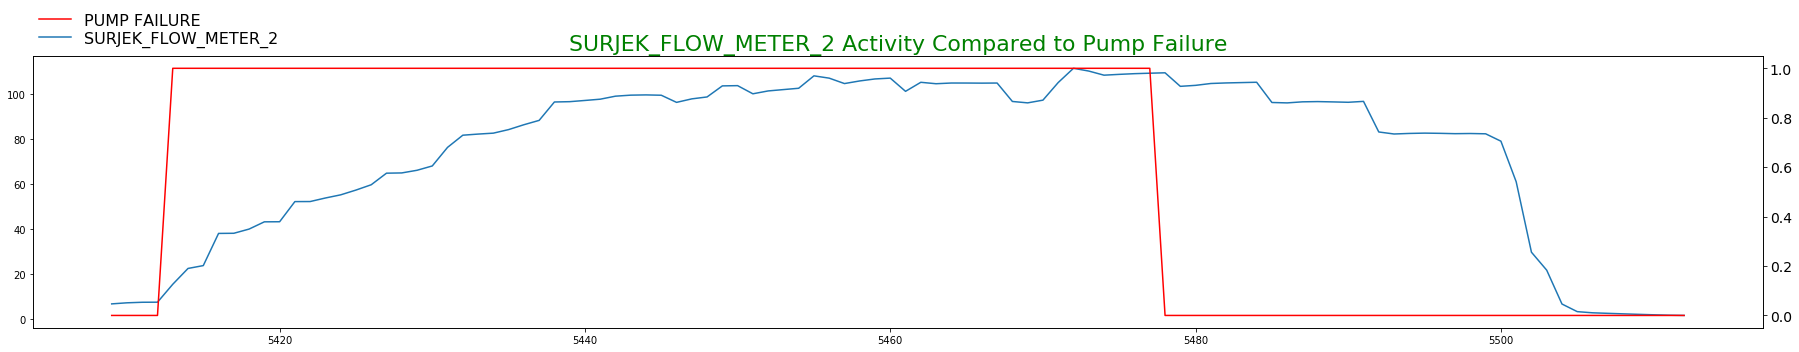

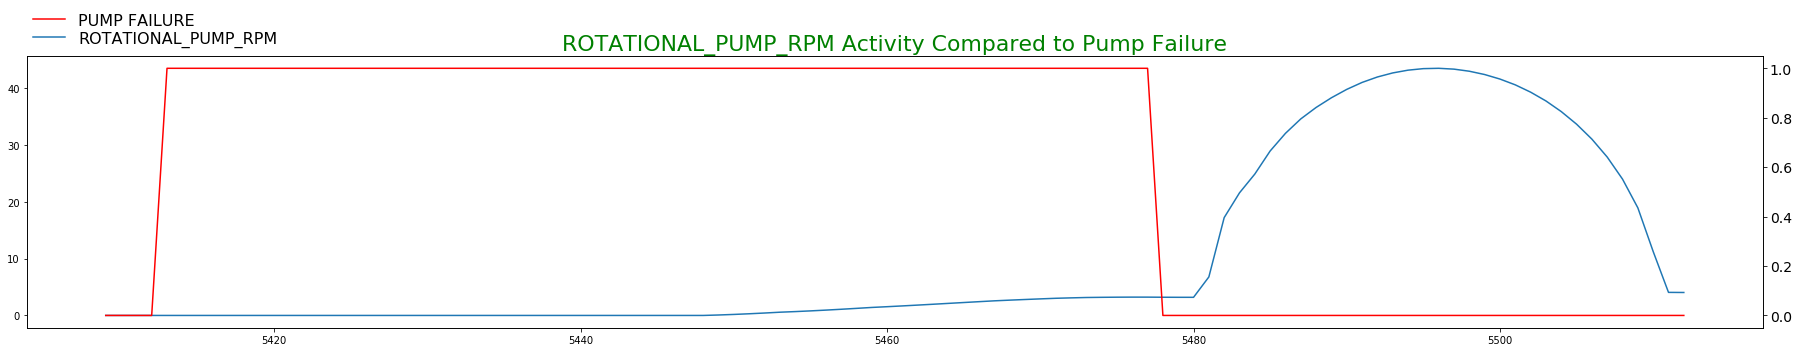

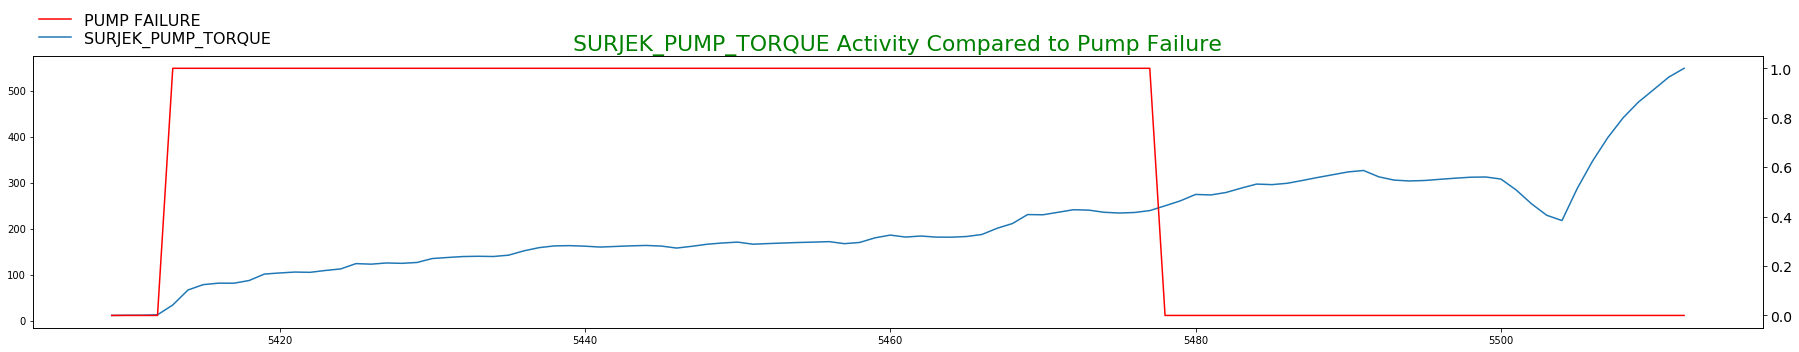

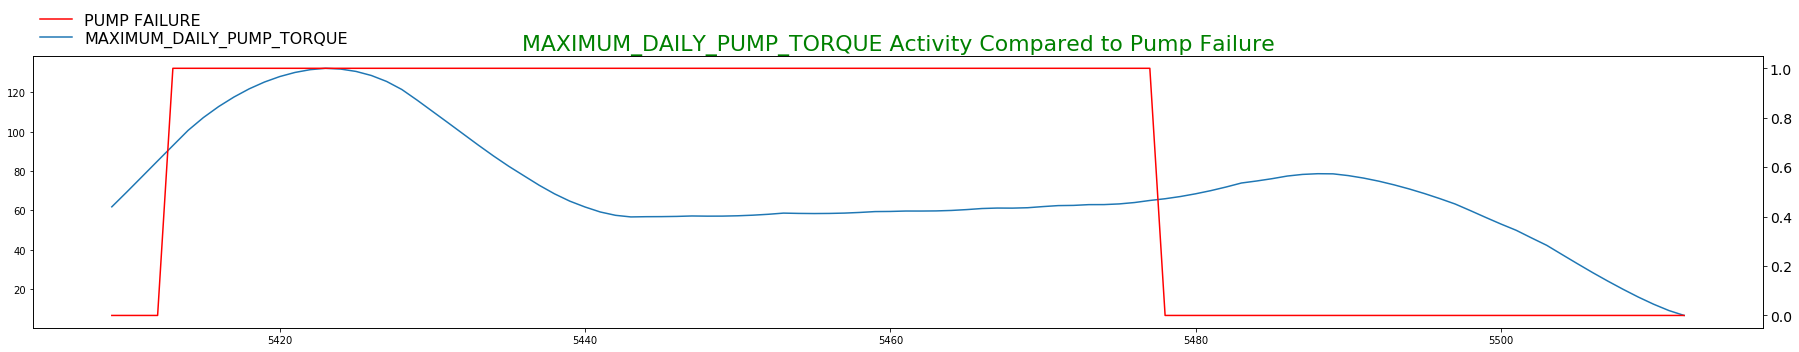

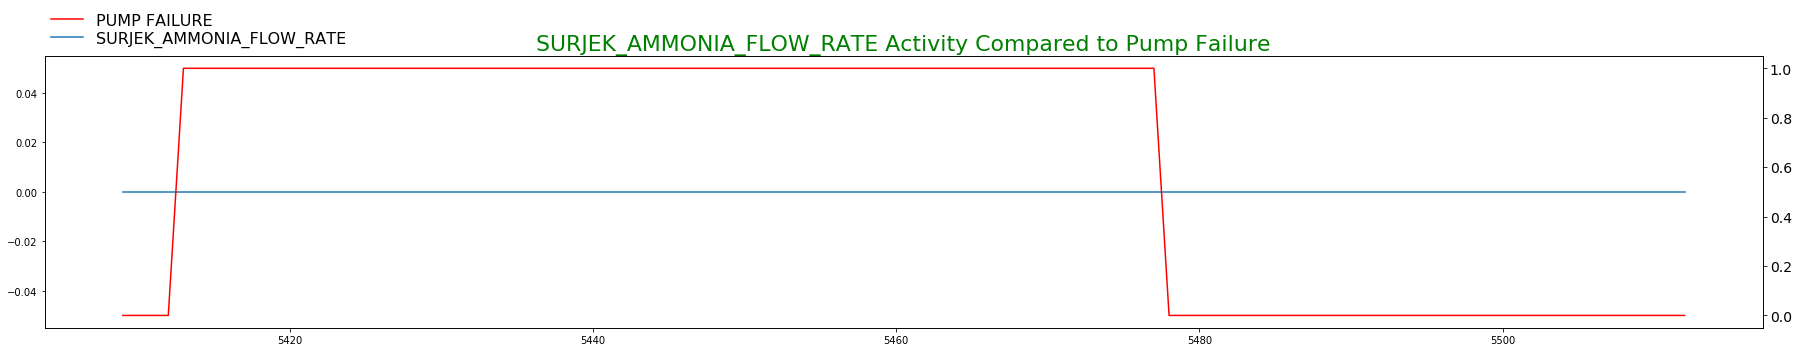

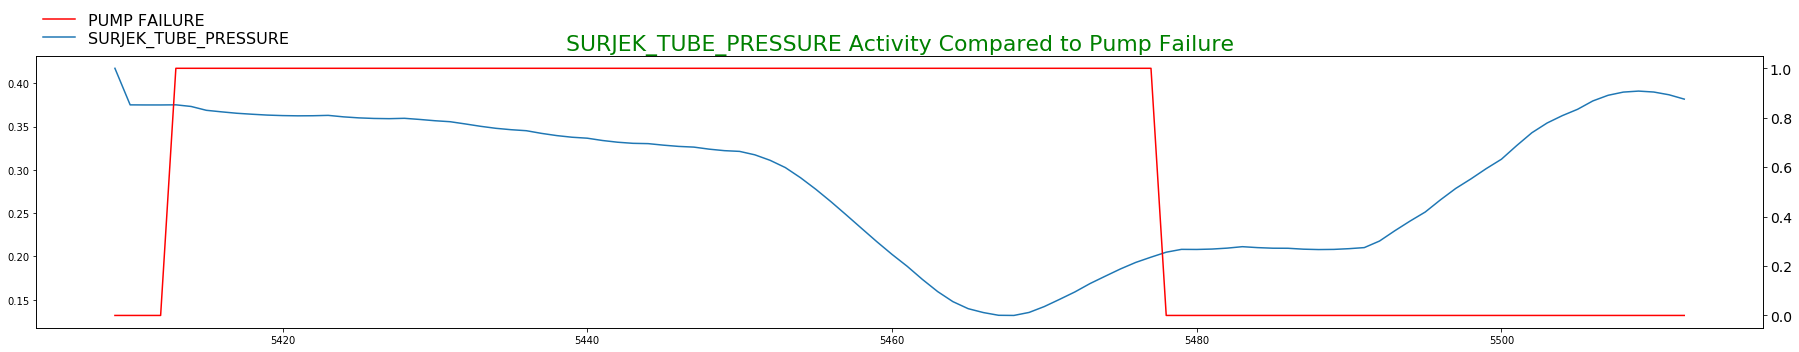

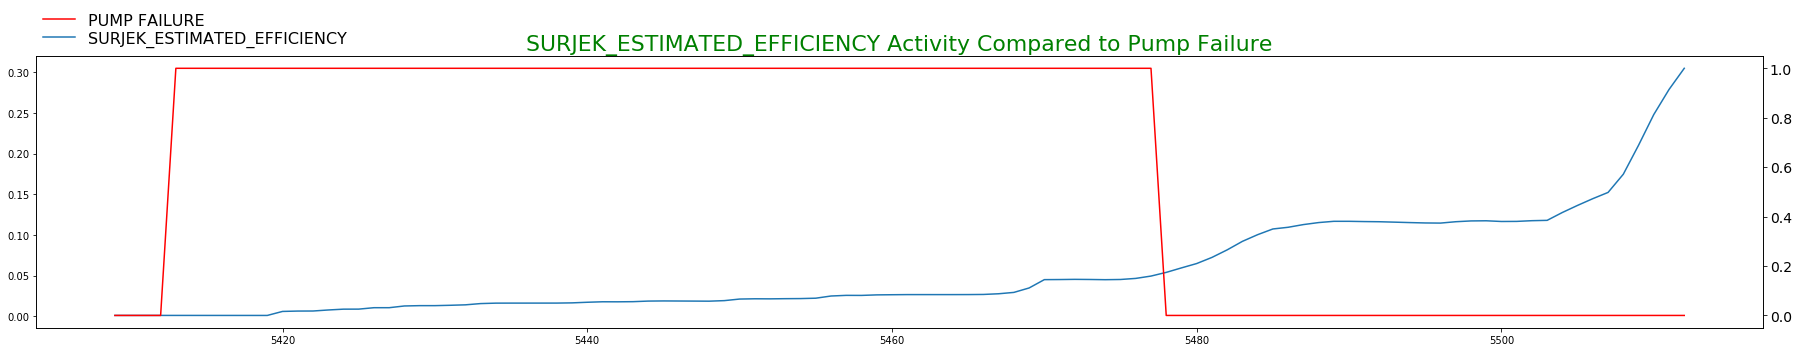

In [14]:
from datetime import datetime
dataframe = pd.concat(df)
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME']).apply(lambda x: x.strftime('%m/%d/%Y %H:%M:%S')if not pd.isnull(x) else '')
dataframe['PUMP FAILURE (1 or 0)'].fillna(0,inplace=True) # Fill NaN with 0
dataframe.dropna(inplace=True)
dataframe.reset_index(inplace=True)
filt9 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)', 'TIMEFRAME']
filt10 = ['PUMP FAILURE (1 or 0)']
filt11 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
colList = dataframe[filt11].columns
mpl.rcParams['figure.figsize'] = (25,5)
#-------------------------------------------------------

#Standard Deviation Setup
rollingdf = dataframe[filt11].rolling(30).std()
rollingdf.dropna(inplace=True)
rollingdf = rollingdf.join(dataframe[['PUMP FAILURE (1 or 0)', 'TIMEFRAME']], how='inner')
rollingdf_filtered = rollingdf[(rollingdf['TIMEFRAME'] >= "12/10/2014 14:40:00")&\
                               (rollingdf['TIMEFRAME'] <= "12/10/2014 14:45:00")]
failureState = rollingdf_filtered[filt10]


#Plot Loop
for i in colList:
    ax1 = rollingdf_filtered[i].plot()
    ax2 = ax1.twinx()
    ax2.plot(failureState, 'red', label = 'PUMP FAILURE')
    ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False, fontsize=16)
    ax2.legend(loc='lower left', bbox_to_anchor= (0.0, 1.08), ncol=2,
            borderaxespad=0, frameon=False, fontsize=16)
    minTime = rollingdf_filtered.index.min()
    maxTime = rollingdf_filtered.index.max()
    plt.tight_layout()
    plt.title(i + " Activity Compared to Pump Failure",fontsize = 22, color='green')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 11: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).


(8.5, -0.5)

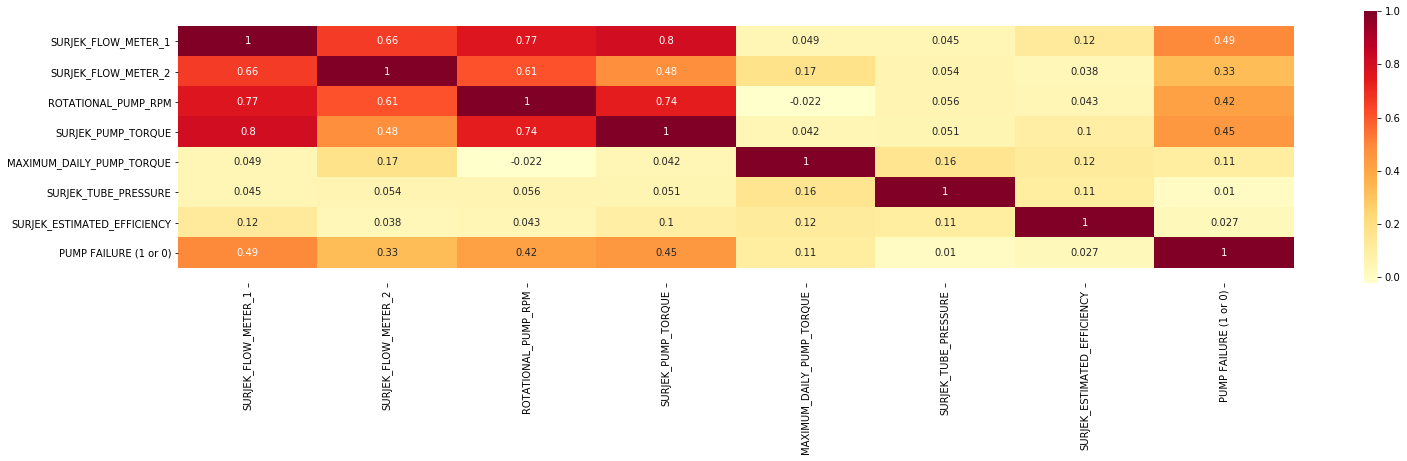

In [15]:
from datetime import datetime
dataframe = pd.concat(df)
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%m/%d/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)
dataframe['PUMP FAILURE (1 or 0)'].fillna(0,inplace=True) # Fill NaN with 0
dataframe.dropna(inplace=True)
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
corrdf = dataframe[filt].corr()
#------------------------------------------------------------
dfheatmap = sns.heatmap(corrdf, cmap='YlOrRd', annot=True)
bottom, top = dfheatmap.get_ylim()
dfheatmap.set_ylim(bottom + 0.5, top - 0.5)


**Open-ended Question:**

Which variables seem to correlate with Pump Failure?

### Step 12: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

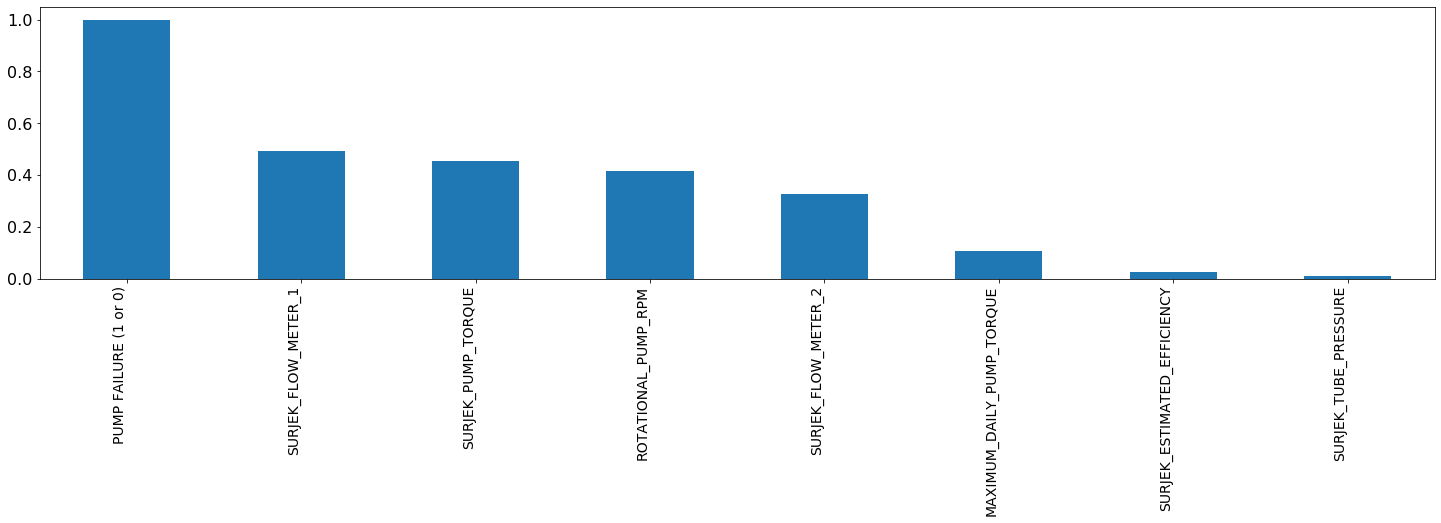

In [16]:
colList_corr = corrdf.columns
corrdf=corrdf.sort_values('PUMP FAILURE (1 or 0)', ascending=False)
corrdf['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize = 16)

---

### Step 13: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. This time, you'll transform 'raw' variables using a rolling standard deviation. 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Using the newly created rolling standard deviation dataframe, use the Seaborn heatmap function to replot this dataframe into a heatmap.

Do any variables stand out? If yes, list these out below your heatmap.

**Note:** We have provided the initial dataframe and filters.

(8.5, -0.5)

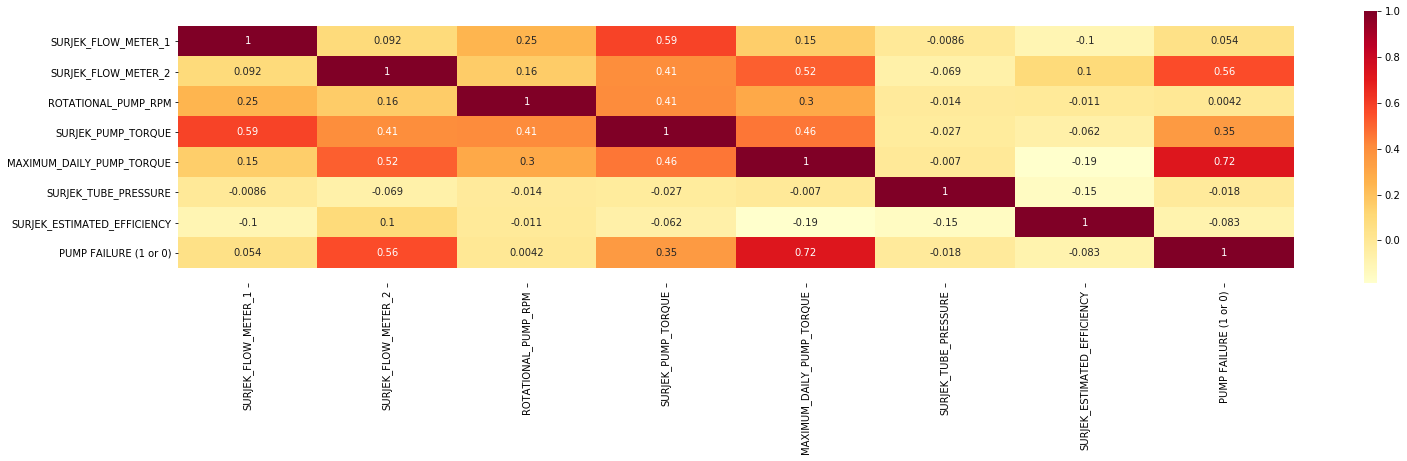

In [17]:
corrdf_rolling = rollingdf[filt].corr()
corrdf_rolling_heatmap = sns.heatmap(corrdf_rolling, cmap='YlOrRd', annot=True)
bottom, top = corrdf_rolling_heatmap.get_ylim()
corrdf_rolling_heatmap.set_ylim(bottom + 0.5, top - 0.5)

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 14: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0). What is the R Squared for the model and what does this signify?

ii) Repeat i) but this time use the rolling standard deviation variables you created previously. What is the R Squared for the model and what does this signify?

**Open-ended Question:**

Which linear regression model seems to be a better fit?

**Note:** We have provided the initial dataframe and filter list.

In [18]:
#Filters are from steps 9 & 10. Dependent variable is ['PUMP FAILURE (1 or 0)']

# X is a matrix 
X = dataframe[filt11]
X = sm.add_constant(X)
y = dataframe[filt8]

OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.264
Model:                               OLS   Adj. R-squared:                  0.264
Method:                    Least Squares   F-statistic:                     358.8
Date:                   Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                           16:43:23   Log-Likelihood:                 7548.9
No. Observations:                   6998   AIC:                        -1.508e+04
Df Residuals:                       6990   BIC:                        -1.503e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1293      0.056      2.318      0.020       0.020       0.239
SURJEK_FLOW_METER_1             0.0017   9.98e-05     16.797      0.000       0.001       0.002
SURJEK_FLOW_METER_2            -0.0001   5.77e-05     -2.085      0.037      -0.000   -7.17e-06
ROTATIONAL_PUMP_RPM             0.0003   8.17e-05      4.110      0.000       0.000       0.000
SURJEK_PUMP_TORQUE              0.0001   1.43e-05      7.011      0.000    7.23e-05       0.000
MAXIMUM_DAILY_PUMP_TORQUE    2.036e-05   2.18e-06      9.321      0.000    1.61e-05    2.46e-05
SURJEK_AMMONIA_FLOW_RATE     6.158e-19   1.48e-19      4.174      0.000    3.27e-19    9.05e-19
SURJEK_TUBE_PRESSURE           -0.0004      0.000     -2.516      0.012      -0.001   -8.17e-05
SURJEK_ESTIMATED_EFFICIENCY    -0.0052      0.001     -3.866      0.000      -0.008      -0.003
==============================================================================
Omnibus:                     7983.490   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           972591.134
Skew:                           5.871   Prob(JB):                         0.00
Kurtosis:                      59.548   Cond. No.                     5.49e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
# Dependent variable is ['PUMP FAILURE (1 or 0)']

X = rollingdf[filt11]
X = sm.add_constant(X)
y = rollingdf[filt8]
OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.626
Model:                               OLS   Adj. R-squared:                  0.625
Method:                    Least Squares   F-statistic:                     1662.
Date:                   Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                           16:43:39   Log-Likelihood:                 9857.5
No. Observations:                   6969   AIC:                        -1.970e+04
Df Residuals:                       6961   BIC:                        -1.964e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0123      0.001    -11.184      0.000      -0.014      -0.010
SURJEK_FLOW_METER_1            -0.0024      0.000     -7.291      0.000      -0.003      -0.002
SURJEK_FLOW_METER_2             0.0016   6.42e-05     25.601      0.000       0.002       0.002
ROTATIONAL_PUMP_RPM            -0.0065      0.000    -30.669      0.000      -0.007      -0.006
SURJEK_PUMP_TORQUE              0.0003   2.55e-05     10.093      0.000       0.000       0.000
MAXIMUM_DAILY_PUMP_TORQUE       0.0059   8.82e-05     66.887      0.000       0.006       0.006
SURJEK_AMMONIA_FLOW_RATE    -1.214e-19   2.87e-19     -0.424      0.672   -6.83e-19     4.4e-19
SURJEK_TUBE_PRESSURE            0.0002      0.000      0.403      0.687      -0.001       0.001
SURJEK_ESTIMATED_EFFICIENCY     0.0026      0.002      1.122      0.262      -0.002       0.007
==============================================================================
Omnibus:                     2611.798   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           405452.729
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                      40.341   Cond. No.                     3.11e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Great job creating those regressive equations! You've reached the final step of this case study!
### Step 15: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this. Make the line widths wider than 1 so the plots are easier to see. We have provided the initial figure size.

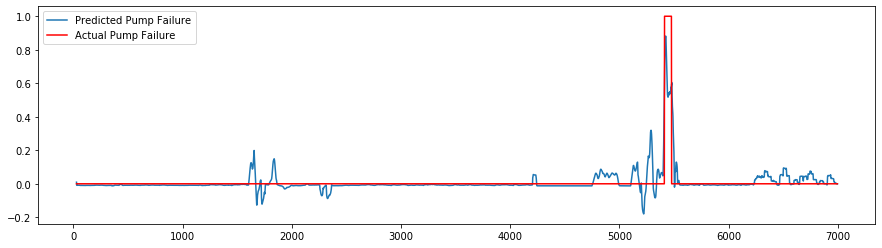

In [20]:
#Below is the first part of the code
mpl.rcParams['figure.figsize'] = (15,4)
#----write your code below------

yPrediction = OLSmodelResult.predict(X)
plt.plot(yPrediction, label='Predicted Pump Failure')
plt.plot(y, label='Actual Pump Failure', color ='red')
plt.legend(loc=2)


You've made it to the end of this challenging case study — well done! You've now converted all of the analysis you did for Southern Water Corp using Excel into Python. You created visualizations using Seaborn, manipulated datasets with pandas, and so much more! This case study was designed to give you practice using Python to analyze datasets both large and small — you can now apply these skills to work you do throughout your career as a data analyst.
